In [1]:
import os
import sys
# Determine the project root directory (adjust the path as necessary)
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../../..'))
print(project_root)
sys.path.append(project_root)

c:\Users\Thomas Gausmann\sciebo - Gausmann, Thomas (t_gaus04@uni-muenster.de)@uni-muenster.sciebo.de\Masterarbeit\price_simulator


In [2]:

import price_simulator.src.utils.analyzer as Analyzer
#from price_simulator.src.algorithm.agents.approximate import DiffDQN
from price_simulator.src.algorithm.agents.simple import AlwaysDefectAgent
from price_simulator.src.algorithm.agents.tabular import Qlearning
from price_simulator.src.algorithm.demand import LogitDemand
from price_simulator.src.algorithm.environment import DiscreteSynchronEnvironment
from price_simulator.src.algorithm.policies import DecreasingEpsilonGreedy
from price_simulator.src.algorithm.agents.lstm_agent import SimpleLSTMAgent  # Import the new LSTM agent

Loss: 0.0, Target: 0.4950571766575621, Local Estimates: 0.4950571656227112
Loss: 0.0, Target: 0.4491783283916919, Local Estimates: 0.4491783380508423
Loss: 0.0, Target: 0.5230964850191588, Local Estimates: 0.52309650182724
Loss: 0.0, Target: 0.40982977746969945, Local Estimates: 0.4098297655582428
Loss: 0.0, Target: 0.38464350807555114, Local Estimates: 0.3846434950828552
Loss: 0.0, Target: 0.5466276714292873, Local Estimates: 0.5466277003288269
Loss: 0.0, Target: 0.4694979134057651, Local Estimates: 0.4694979190826416
Loss: 0.0, Target: 0.5824473966898706, Local Estimates: 0.5824474096298218
Loss: 0.0, Target: 0.42099797718421794, Local Estimates: 0.4209979772567749
Loss: 0.0, Target: 0.45646797543621703, Local Estimates: 0.45646798610687256
Loss: 0.0, Target: 0.5859092476766105, Local Estimates: 0.5859092473983765
Loss: 0.0, Target: 0.3766638355348096, Local Estimates: 0.37666383385658264
Loss: 0.0, Target: 0.5177894768672733, Local Estimates: 0.5177894830703735
Loss: 0.0, Target: 0.

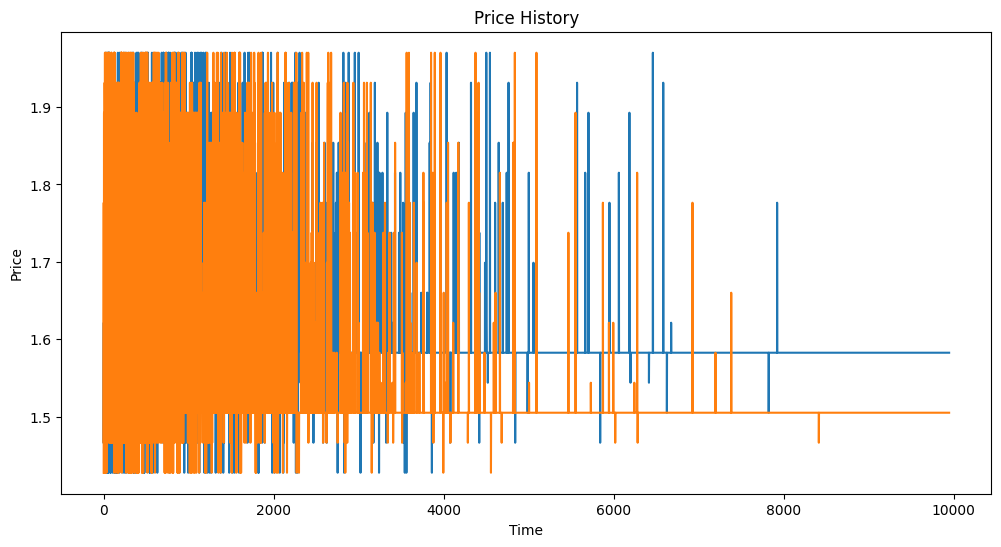

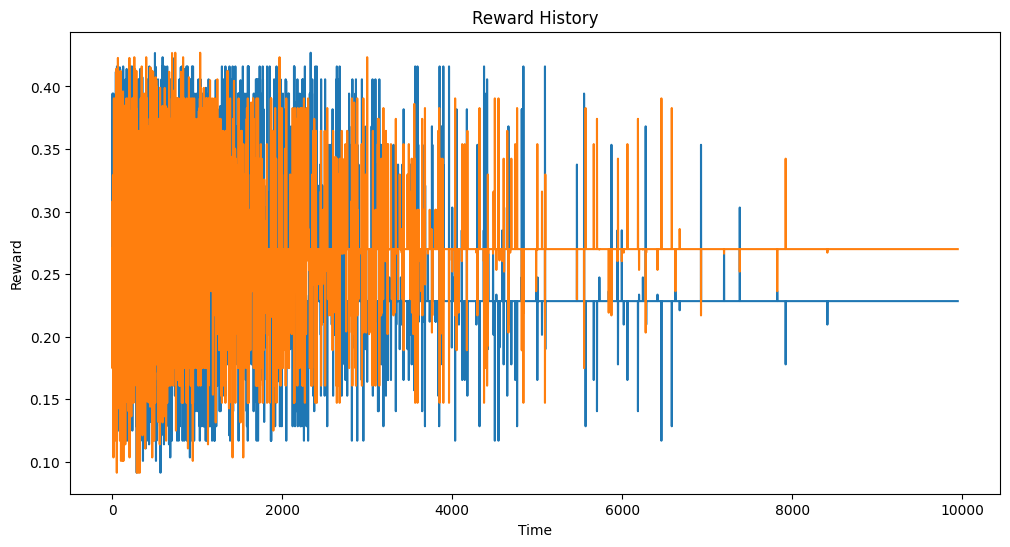

In [3]:
def run():
    dqn_env = DiscreteSynchronEnvironment(
        markup=0.1,
        n_periods=10000,
        possible_prices=[],
        n_prices=15,
        demand=LogitDemand(outside_quality=0.0, price_sensitivity=0.25),
        history_after=50,
        agents=[
            SimpleLSTMAgent(
                discount=0.95, learning_rate=0.125, decision=DecreasingEpsilonGreedy(), marginal_cost=1.0, quality=2.0, sequence_length=5
            ),
            SimpleLSTMAgent(
                discount=0.95, learning_rate=0.125, decision=DecreasingEpsilonGreedy(), marginal_cost=1.0, quality=2.0, sequence_length=5
            )
        ],
    )
    dqn_env.play_game()
    Analyzer.analyze(dqn_env)
    import matplotlib.pyplot as plt

    # Plot price history
    plt.figure(figsize=(12, 6))
    plt.plot(dqn_env.price_history)
    plt.title('Price History')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()

    # Plot reward history
    plt.figure(figsize=(12, 6))
    plt.plot(dqn_env.reward_history)
    plt.title('Reward History')
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.show()

run()